In [15]:
from sklearn.datasets import load_iris

In [16]:
iris = load_iris()
X = iris.data
y = iris.target
dfX = pd.DataFrame(X, columns = iris.feature_names)
dfy = pd.DataFrame(y, columns = ["species"])

In [17]:
dir(iris)

['DESCR',
 'data',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [18]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [19]:
df = pd.DataFrame(iris.data, columns = iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
df = pd.concat([dfX, dfy], axis=1)
df = df[["sepal length (cm)", "species"]]

In [26]:
df = df[df.species.isin([0, 1])]
df = df.rename(columns = {"sepal length (cm)": "sepal_length"})

In [27]:
import statsmodels.api as sm

In [29]:
model =  sm.Logit.from_formula("species ~ sepal_length", data = df)
result = model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.321056
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                species   No. Observations:                  100
Model:                          Logit   Df Residuals:                       98
Method:                           MLE   Df Model:                            1
Date:                Sat, 26 Dec 2020   Pseudo R-squ.:                  0.5368
Time:                        09:41:02   Log-Likelihood:                -32.106
converged:                       True   LL-Null:                       -69.315
Covariance Type:            nonrobust   LLR p-value:                 6.320e-18
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -27.8315      5.434     -5.122      0.000     -38.481     -17.182
sepal_length     5.1403

In [30]:
# 기준값
(0.5 + 27.8315) /  5.1403

5.511643289302181

In [32]:
y_pred = result.predict(df.sepal_length) >= 0.5
plt.plot(y_pred)

In [34]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(df.species, y_pred)

array([[45,  5],
       [ 6, 44]])

In [35]:
from sklearn.metrics import classification_report

print(classification_report(df.species, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        50
           1       0.90      0.88      0.89        50

    accuracy                           0.89       100
   macro avg       0.89      0.89      0.89       100
weighted avg       0.89      0.89      0.89       100



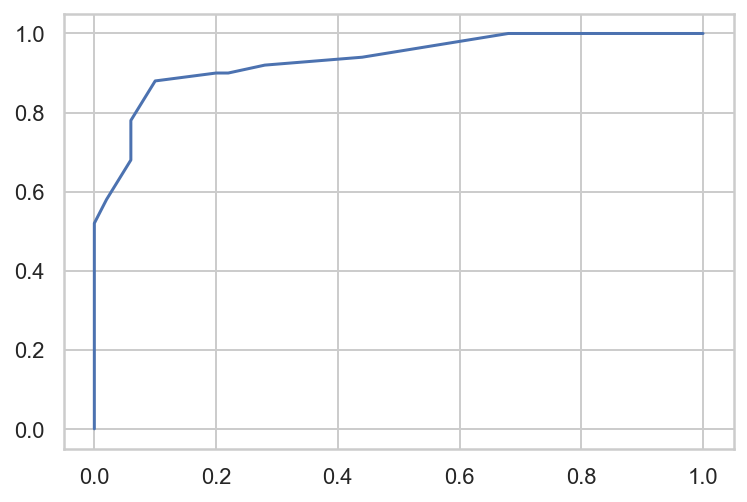

In [40]:
from sklearn.metrics import roc_curve

fpr, tpr, thresh = roc_curve( df.species, result.predict(df.sepal_length))
plt.plot(fpr, tpr)
plt.show()
%matplotlib inline

In [41]:
from sklearn.metrics import auc
auc(fpr, tpr)

0.9326

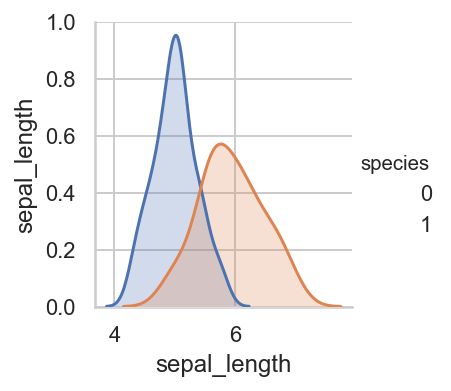

In [42]:
sns.pairplot(df, hue = 'species')
plt.show()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# Classification = Binary Classification 

In [43]:
sns.distplot(df[df.species == 'virginica']['petal length (cm)'], hist=True, rug=True)
sns.distplot(df[df.species == 'versicolor']['petal length (cm)'], hist=True, rug=True)
plt.show()

KeyError: 'petal length (cm)'

In [26]:
df['species2'] = df['species'] == 'versicolor'

def accuracy(threshold):
    df['predict'] = df["petal length (cm)"] <= threshold
    return (df.predict == df.species2).sum()

thresholds = np.linspace(4, 6, 21)
list_accuracy = []
for t in thresholds:
    list_accuracy.append(accuracy(t))
    
plt.plot(thresholds, list_accuracy, "ro-")

KeyError: 'species'

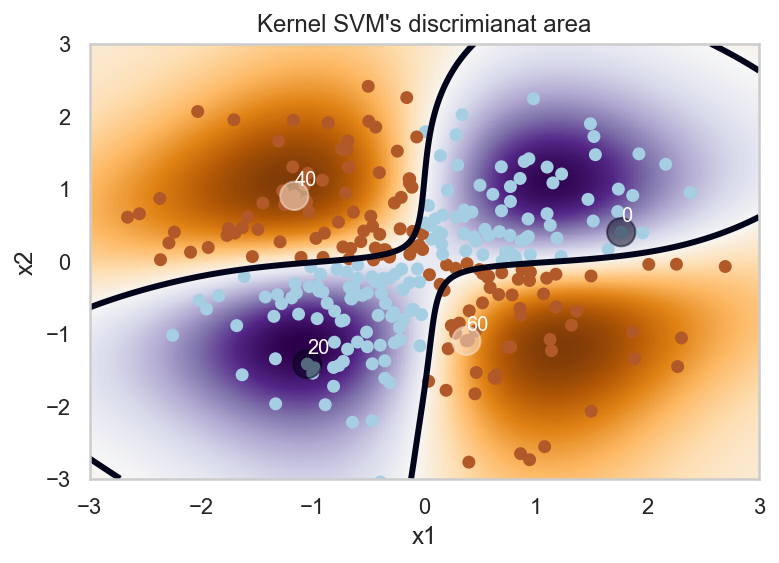

In [13]:
from sklearn import svm

xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                     np.linspace(-3, 3, 500))
np.random.seed(0)
X = np.random.randn(300, 2)
Y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0)

model = svm.NuSVC().fit(X, Y)
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=3)
plt.scatter(X[:, 0], X[:, 1], s=30, c=Y, cmap=plt.cm.Paired)
idx = [0, 20, 40, 60]
plt.scatter(X[idx, 0], X[idx, 1], c=Y[idx], s=200, alpha=0.5)
for i in idx:
    plt.annotate(i, xy=(X[i, 0], X[i, 1]+0.15), color='white')
plt.grid(False)
plt.axis([-3, 3, -3, 3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Kernel SVM's discrimianat area")
plt.show()

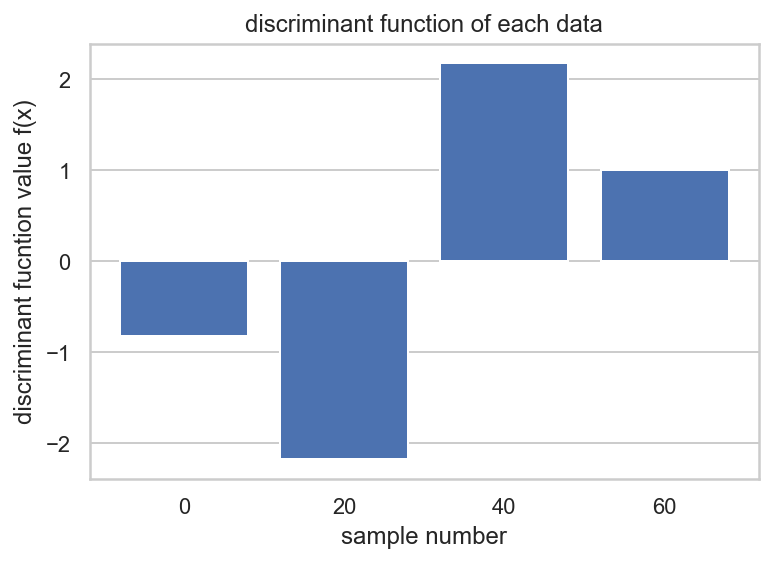

In [12]:
plt.bar(range(len(idx)), model.decision_function(X[idx]))
plt.xticks(range(len(idx)), idx)
plt.gca().xaxis.grid(False)
plt.xlabel("sample number")
plt.ylabel("discriminant fucntion value f(x)")
plt.title("discriminant function of each data")
plt.show()

# 판별함수는 2진분류만 한다 그래서 다중 클래스 분류

# 다중 클래스 분류
    OvO(one-vs-one)
    OvR(one-vs-the rest)

# 성능평가

# sklearn package
    

In [4]:
### confusion matrix
from sklearn.metrics import confusion_matrix

In [5]:
y_true = [2, 0, 2 ,2 ,1]
y_pred = [0, 0, 2, 2, 2]

In [6]:
confusion_matrix(y_true, y_pred)

array([[1, 0, 0],
       [0, 0, 1],
       [1, 0, 2]])

|true\pred    |Positive |Neggtive|
| --- | --- | --- |
|Positive|True Positive |False Negative|
|Negative|True Negative |Ture Negative|


### 1. Accuracy

### 2. Pricision

### 3. Recall

### 4. Fall-Out

### 1. F-Score

<img src="resources/roc.png" width="700" height="300" align="center"/>

<img src="resources/hamonic_mean.png" width="700" height="300" align="center"/>

In [14]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression

X, y = make_classification(n_samples=16, n_features=2,
                           n_informative=2, n_redundant=0,
                           random_state=0)

model = LogisticRegression().fit(X, y)
y_hat = model.predict(X)
f_value = model.decision_function(X)

df = pd.DataFrame(np.vstack([f_value, y_hat, y]).T, columns=["f", "y_hat", "y"])
df.sort_values("f", ascending=False).reset_index(drop=True)

,f,y_hat,y
0,2.363163,1.0,1.0
1,2.065047,1.0,1.0
2,1.633657,1.0,1.0
3,1.626171,1.0,1.0
4,1.624967,1.0,1.0
5,1.219678,1.0,1.0
6,0.378296,1.0,0.0
7,0.094285,1.0,1.0
8,-0.438666,0.0,0.0
9,-0.765888,0.0,0.0


In [15]:
fpr1, tpr1, thresholds1 = roc_curve(y, model1.decision_function(X))
fpr2, tpr2, thresholds1 = roc_curve(y, model2.decision_function(X))

plt.plot(fpr1, tpr1, 'o-', ms=2, label="Logistic Regression")
plt.plot(fpr2, tpr2, 'o-', ms=2, label="Kernel SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('위양성률(Fall-Out)')
plt.ylabel('재현률(Recall)')
plt.title('ROC 커브')
plt.show()

NameError: name 'roc_curve' is not defined

scikit-plot

yellobrick

mlextend